In [1]:
import os
import glob
import pandas as pd
import numpy as np

import sys
import pickle
import hdf5storage
import matplotlib as mpl
from matplotlib import cm
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, FixedFormatter, FixedLocator
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']


df_sorted = pd.read_csv('../../../../raw_data/sheets/02-12-20-McGillData_WH_Exprodo-Report_IncExc_CR_CRmed_cham_CRtopfdemeduc_civetpass_slopes_ph5_11_time.age_sorted.csv')


In [2]:
#load in an lv, set behavs and components text once, will be same for all
lv_fname = 'lv_one.mat'
out_base = 'hbm_lv_one'
lv_ = hdf5storage.loadmat(lv_fname)
components_list = []
for idx in range(0,len(lv_['components'].tolist()[0])):
    components_list.append( str(lv_['components'].tolist()[0][idx][0]) )

    behavs_list = []
for idx in range(0,len(lv_['behavs_text'].tolist()[0])):
    behavs_list.append( str(lv_['behavs_text'].tolist()[0][idx][0]) )
    
    
mycolors = ['b','b','olivedrab','olivedrab','maroon','maroon','y','y',
           'darkviolet','darkviolet','c','c','g','g']

lv_one_err = np.concatenate( (lv_['lower'], lv_['upper']))

In [3]:
lv_one_err = np.concatenate( (lv_['lower'], lv_['upper']))
print(lv_['lower'])
print(lv_['upper'])
print(lv_one_err)

[[0.11524586 0.09822022 0.11806367 0.06738008 0.12228712 0.09558446
  0.1007234  0.11598368 0.0971368  0.11069986 0.10548225 0.11862883
  0.10217002 0.09437244]]
[[0.05570222 0.10212444 0.04781923 0.10853897 0.07315014 0.1276212
  0.03982595 0.05917174 0.03140238 0.05432977 0.05284745 0.07386216
  0.07799363 0.07881716]]
[[0.11524586 0.09822022 0.11806367 0.06738008 0.12228712 0.09558446
  0.1007234  0.11598368 0.0971368  0.11069986 0.10548225 0.11862883
  0.10217002 0.09437244]
 [0.05570222 0.10212444 0.04781923 0.10853897 0.07315014 0.1276212
  0.03982595 0.05917174 0.03140238 0.05432977 0.05284745 0.07386216
  0.07799363 0.07881716]]


In [4]:
#Update the behavs list text, in accordance with terms used in text
behavs_list_updated = behavs_list.copy()
#fluency
behavs_list_updated[0] = "LexicalFlu_baseline"; behavs_list_updated[1] = "LexicalFlu_decline"
behavs_list_updated[2] = "SemanticFlu_baseline"; behavs_list_updated[3] = "SemanticFlu_decline"
#memory
behavs_list_updated[4] = "Memory_baseline"; behavs_list_updated[5] = "Memory_decline"
#ah4 reasoning
behavs_list_updated[6] = "InductiveReasoning_baseline"; behavs_list_updated[7] = "InductiveReasoning_decline"
behavs_list_updated[8] = "VerbalReasoning_baseline"; behavs_list_updated[9] = "VerbalReasoning_decline"
behavs_list_updated[10] = "MathematicalReasoning_baseline"; behavs_list_updated[11] = "MathematicalReasoning_decline"
behavs_list_updated[12] = "Vocabulary_baseline"; behavs_list_updated[13] = "Vocabulary_decline"
behavs_list_updated

['LexicalFlu_baseline',
 'LexicalFlu_decline',
 'SemanticFlu_baseline',
 'SemanticFlu_decline',
 'Memory_baseline',
 'Memory_decline',
 'InductiveReasoning_baseline',
 'InductiveReasoning_decline',
 'VerbalReasoning_baseline',
 'VerbalReasoning_decline',
 'MathematicalReasoning_baseline',
 'MathematicalReasoning_decline',
 'Vocabulary_baseline',
 'Vocabulary_decline']

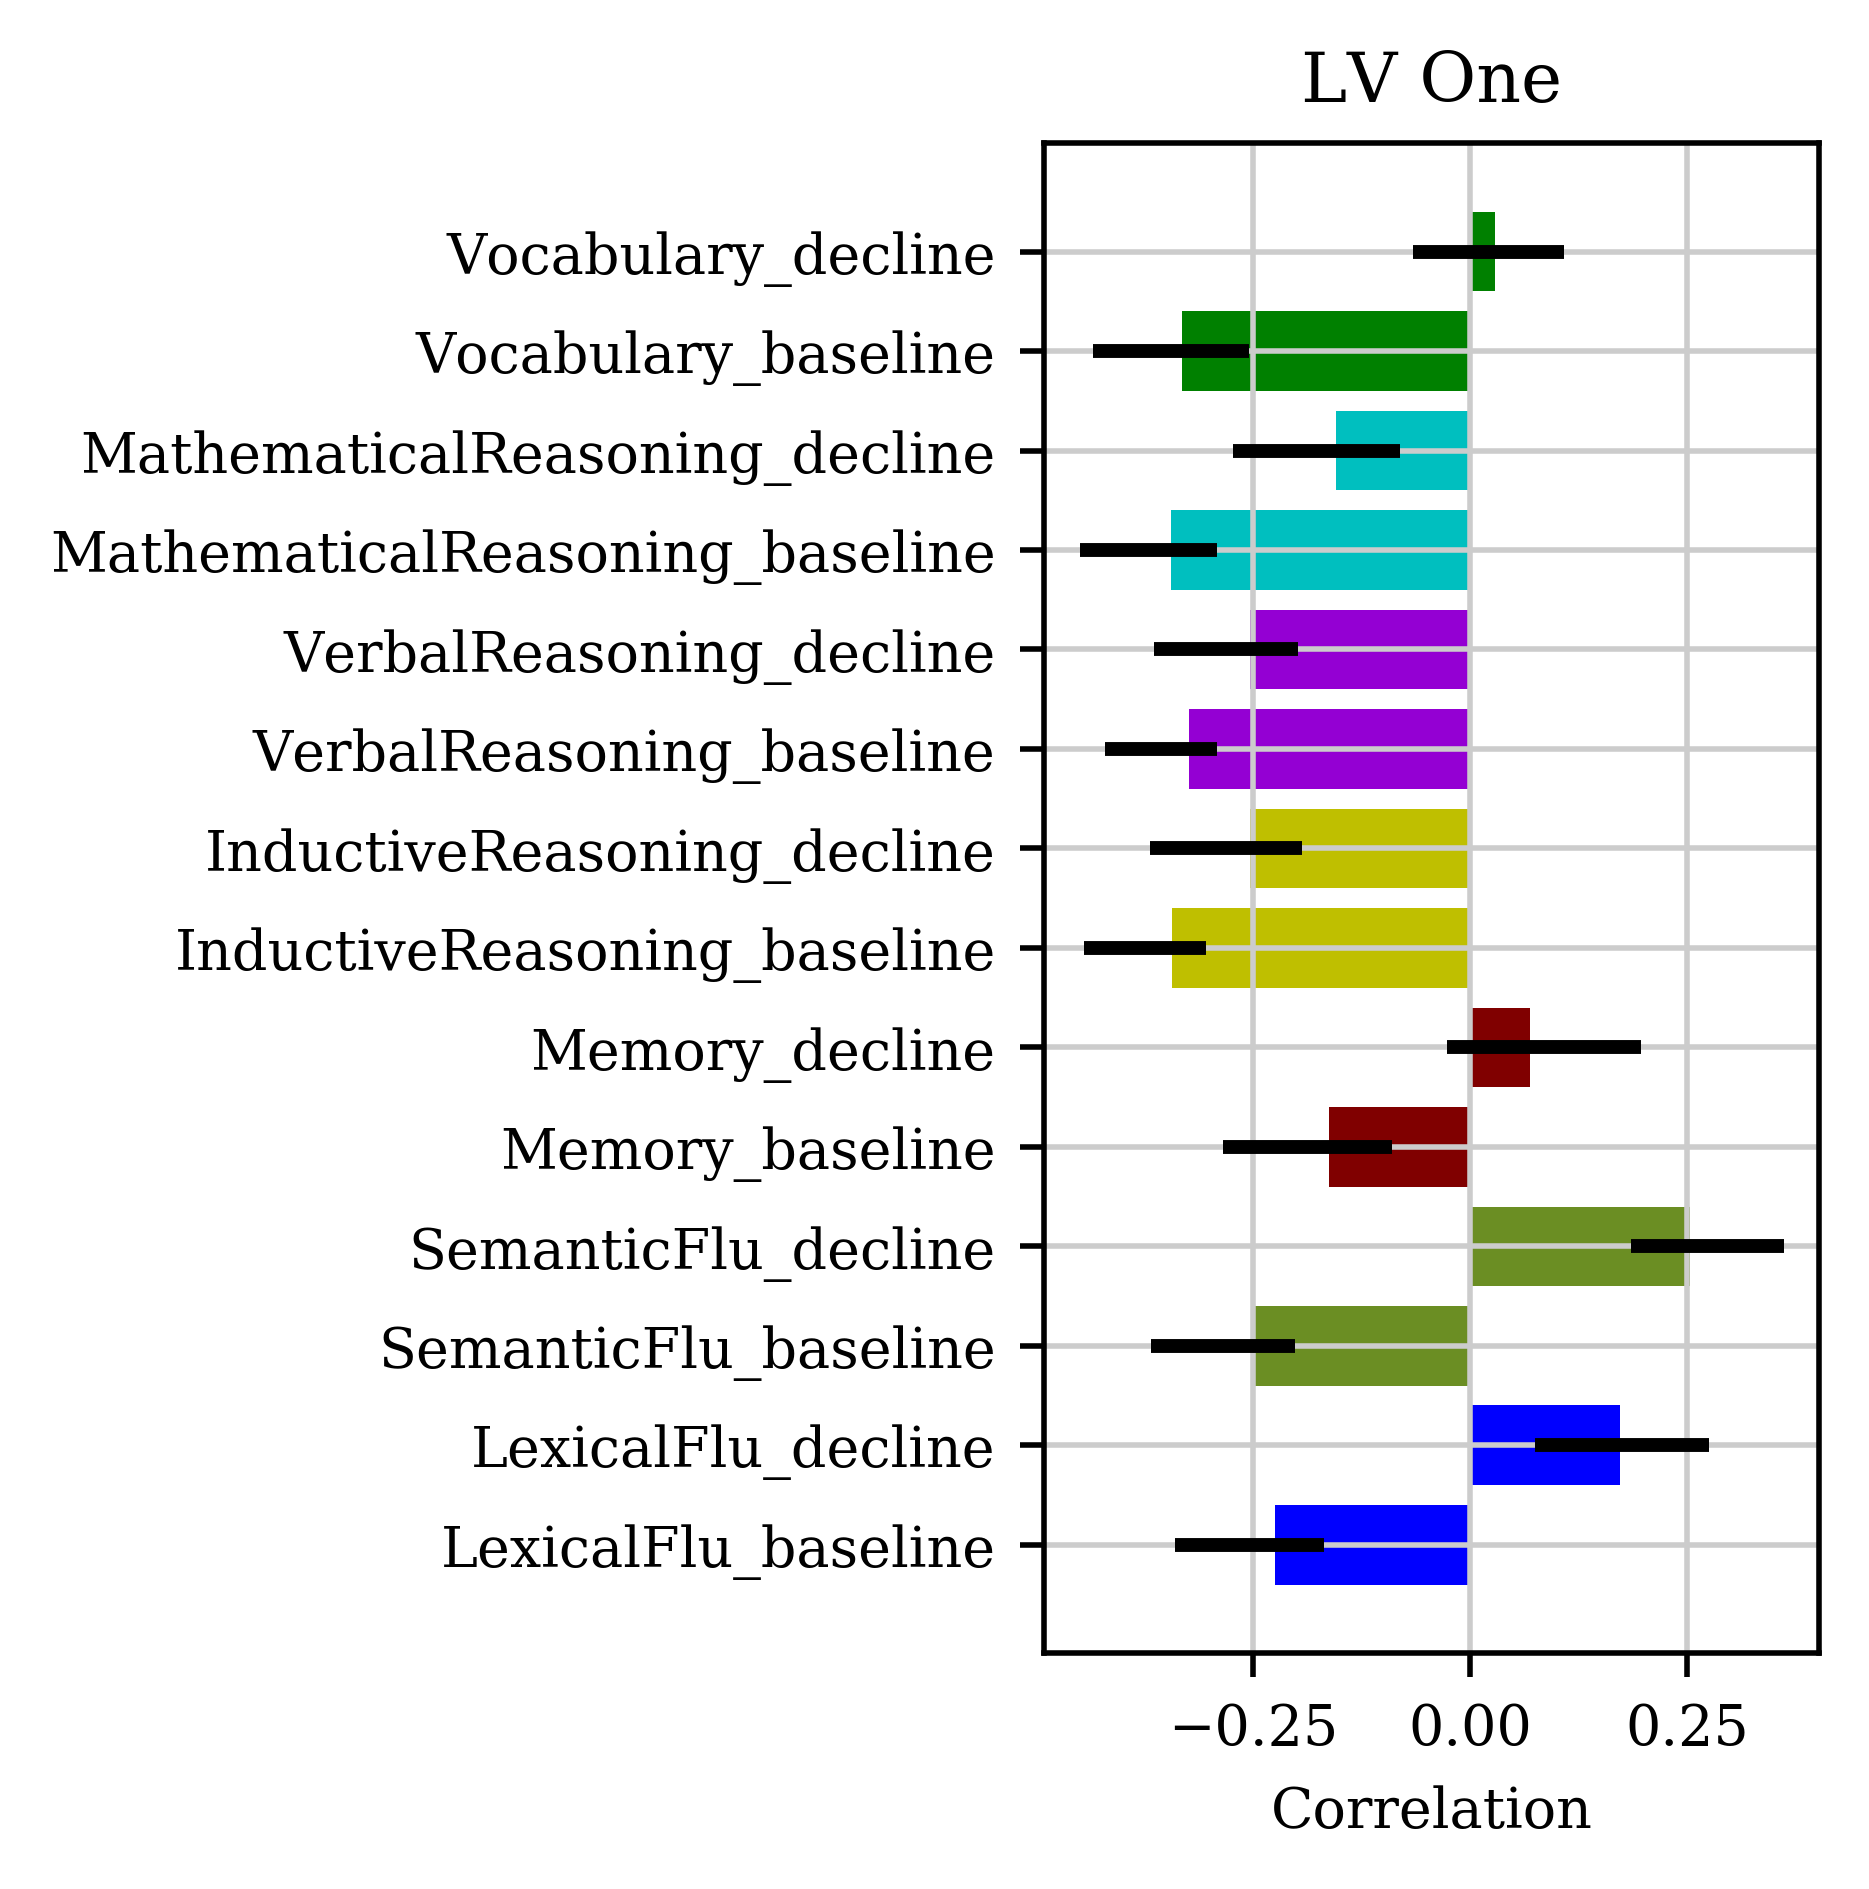

In [5]:
#plot results from lvone
fig, ax = plt.subplots(1,1, figsize = (2,4),dpi = 500)
plt.subplots_adjust(wspace = 0.3)

y_pos = np.arange(len(lv_['lvcorrs'].tolist()[0]))
p = ax.barh(y_pos,lv_['lvcorrs'].tolist()[0], xerr = lv_one_err, align = 'center', color = mycolors,
           error_kw = {'elinewidth':2})
ax.yaxis.set_major_formatter(FixedFormatter(behavs_list_updated))
ax.yaxis.set_major_locator(FixedLocator(y_pos))
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel("Correlation",fontsize=8)
ax.grid(which='both', color='#CCCCCC')
ax.set_facecolor('white')
ax.set_title('LV One', fontsize=10)
plt.savefig("lvone_vertical.png",bbox_inches='tight', dpi = 'figure')

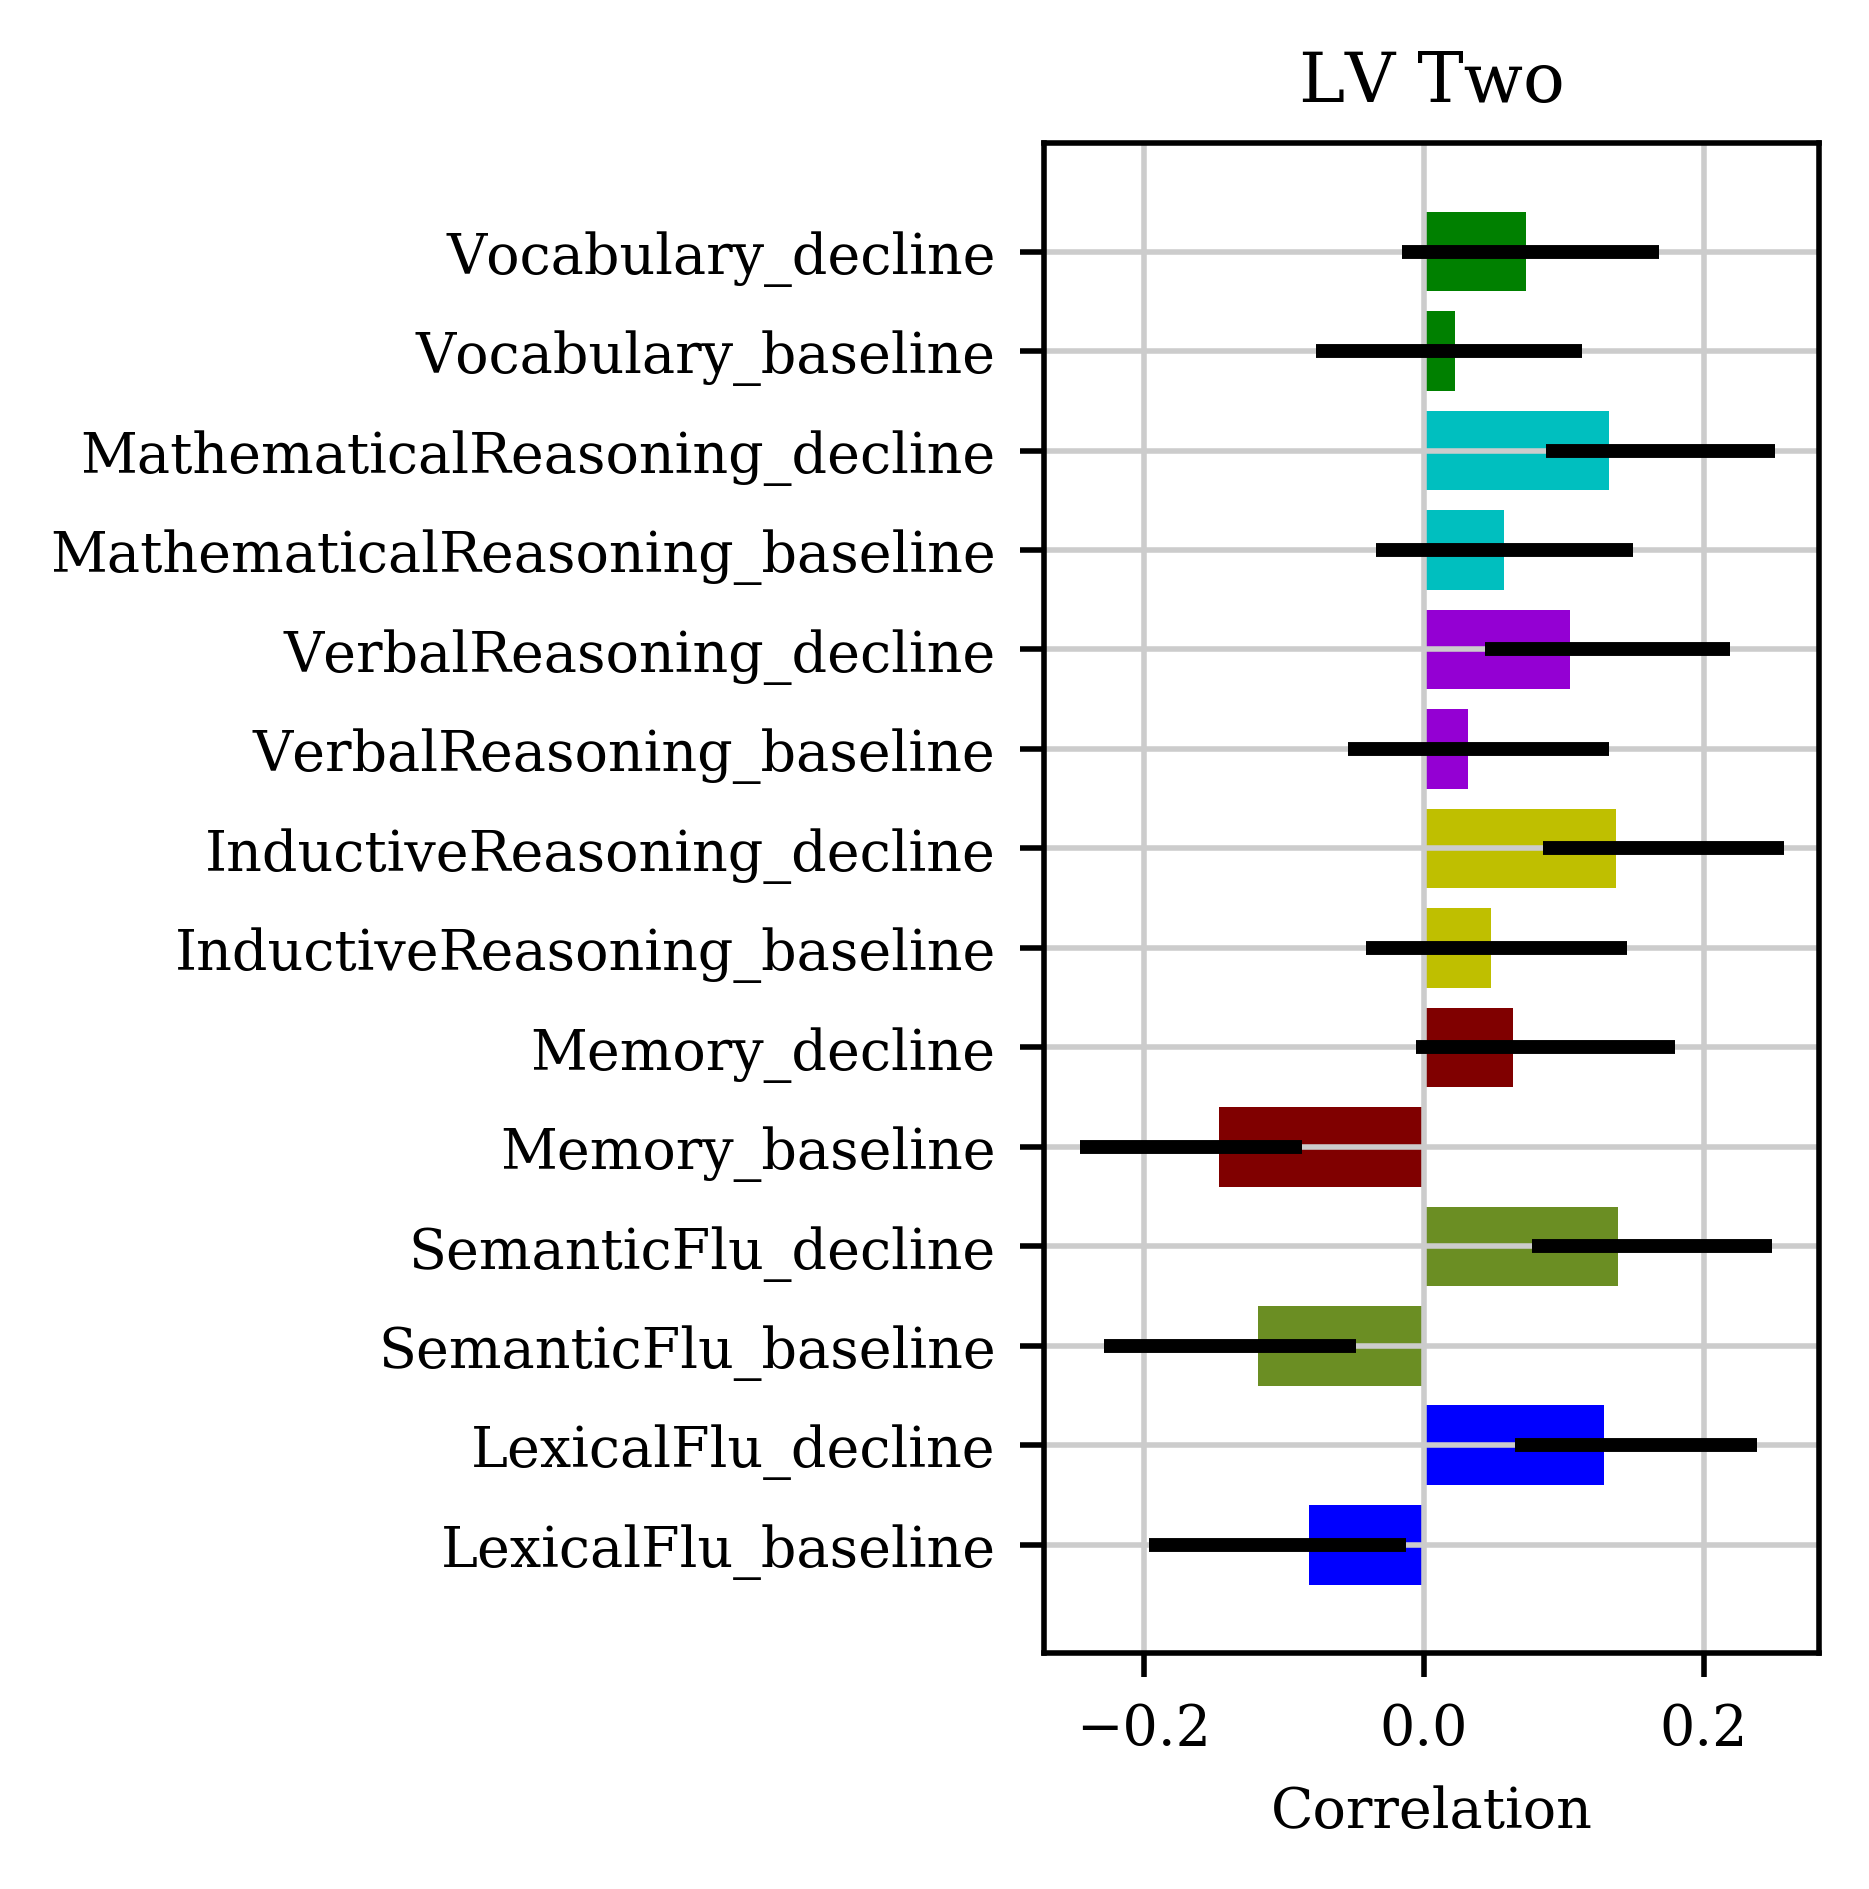

In [6]:
lv_fname = 'lv_two.mat'
out_base = 'hbm_lv_two'
lv_ = hdf5storage.loadmat(lv_fname)
lv_two_err = np.concatenate( (lv_['lower'], lv_['upper']))
#plot results from lvtwo
fig, ax = plt.subplots(1,1, figsize = (2,4),dpi = 500)
plt.subplots_adjust(wspace = 0.3)

y_pos = np.arange(len(lv_['lvcorrs'].tolist()[0]))
p = ax.barh(y_pos,lv_['lvcorrs'].tolist()[0], xerr = lv_two_err, align = 'center', color = mycolors,
           error_kw = {'elinewidth':2})
ax.yaxis.set_major_formatter(FixedFormatter(behavs_list_updated))
ax.yaxis.set_major_locator(FixedLocator(y_pos))
ax.tick_params(axis='both', labelsize=8)
ax.set_xlabel("Correlation",fontsize=8)
ax.grid(which='both', color='#CCCCCC')
ax.set_facecolor('white')
ax.set_title('LV Two', fontsize=10)
plt.savefig("lvtwo_vertical.png",bbox_inches='tight', dpi = 'figure')

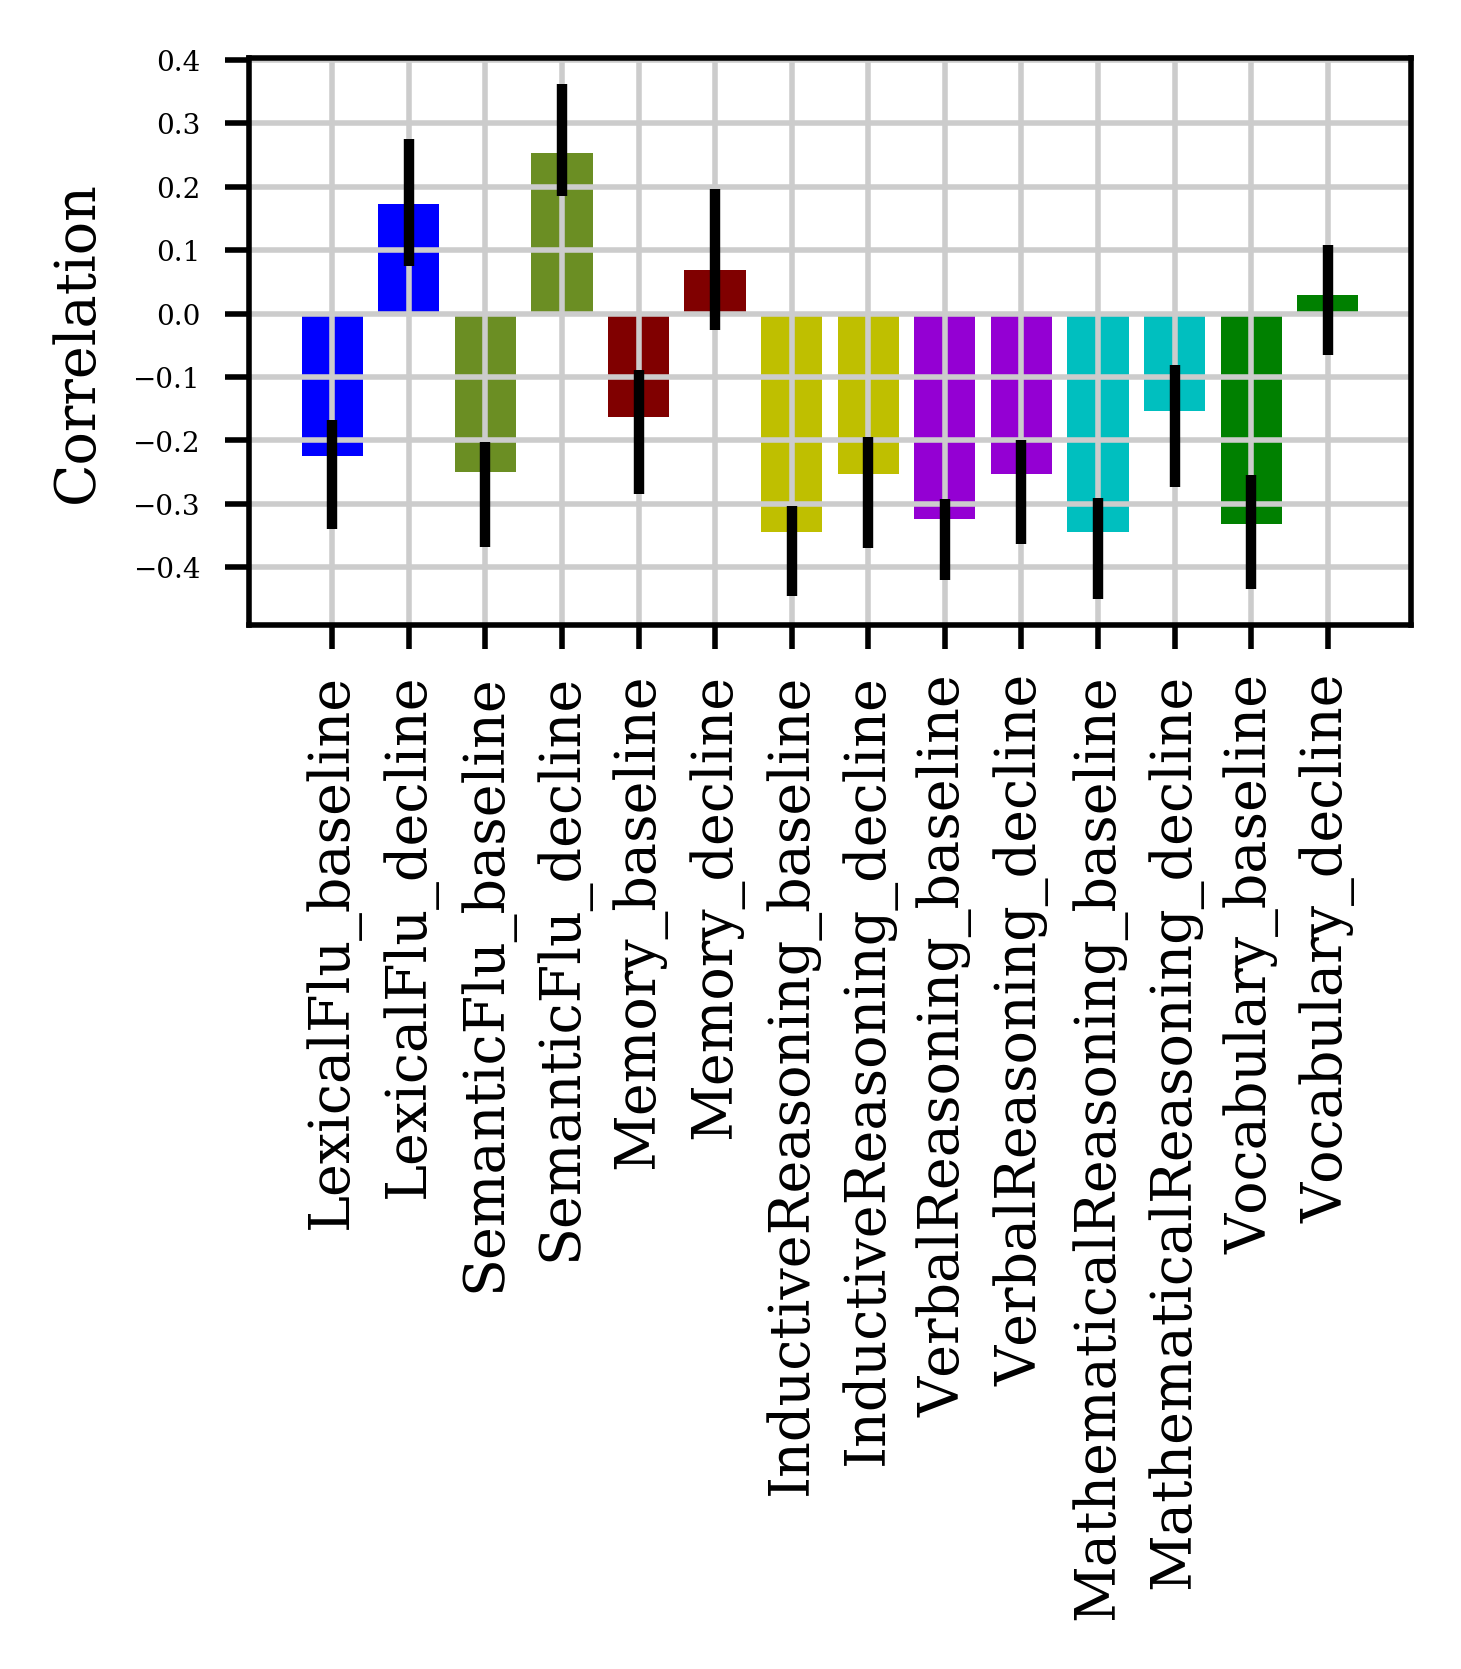

In [7]:
#no sig markers
fig, ax1 = plt.subplots(1,1, figsize = (3,1.5),dpi = 500)

plt.subplots_adjust(hspace = 1.8)

lv_fname = 'lv_one.mat'
lv_one = hdf5storage.loadmat(lv_fname)
y_pos = np.arange(len(lv_one['lvcorrs'].tolist()[0]))
p = ax1.bar(y_pos,lv_one['lvcorrs'].tolist()[0], yerr = lv_one_err, align = 'center', color = mycolors,
           error_kw = {'elinewidth':1.5})
ax1.xaxis.set_major_formatter(FixedFormatter(behavs_list_updated))
ax1.xaxis.set_major_locator(FixedLocator(y_pos))
ax1.tick_params(axis='x', rotation=90)
ax1.tick_params(axis='both', labelsize=8)
ax1.tick_params(axis='y', labelsize=4)
ax1.set_ylabel("Correlation",fontsize=8)
#ax1.yaxis.set_label_position("right")
ax1.grid(which='both', color='#CCCCCC')
ax1.set_facecolor('white')
#ax1.tick_params(labelright=True, right=True, labelleft=False, left=False)
#ax1.set_title('LV One', fontsize=10)
plt.savefig("lvone_flat.png",bbox_inches='tight', dpi = 'figure')

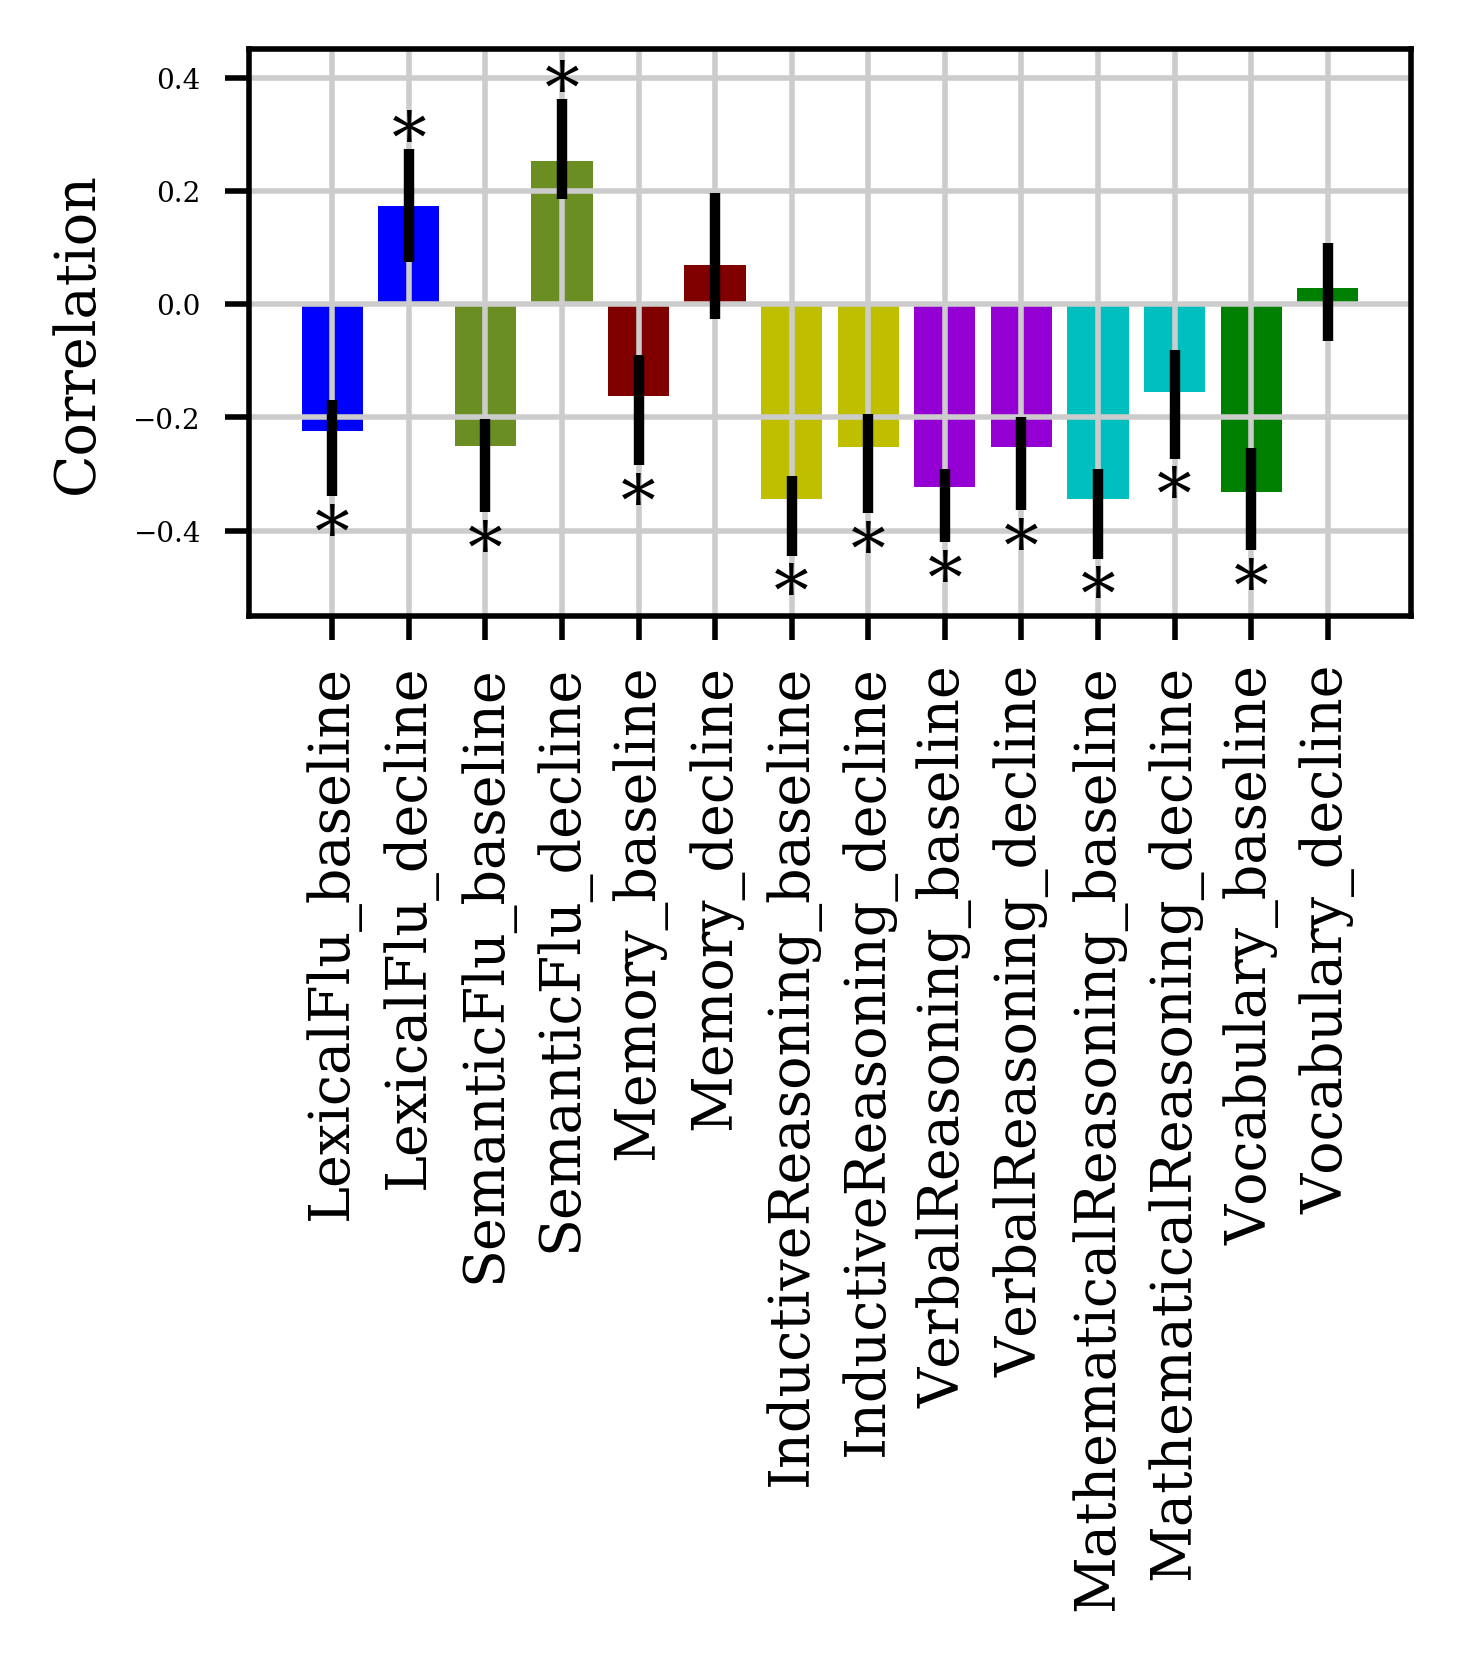

In [8]:
fig, ax1 = plt.subplots(1,1, figsize = (3,1.5),dpi = 500)

plt.subplots_adjust(hspace = 1.8)

lv_fname = 'lv_one.mat'
lv_one = hdf5storage.loadmat(lv_fname)
y_pos = np.arange(len(lv_one['lvcorrs'].tolist()[0]))
p = ax1.bar(y_pos,lv_one['lvcorrs'].tolist()[0], yerr = lv_one_err, align = 'center',color = mycolors,
           error_kw = {'elinewidth':1.5})
ax1.xaxis.set_major_formatter(FixedFormatter(behavs_list_updated))
ax1.xaxis.set_major_locator(FixedLocator(y_pos))
ax1.tick_params(axis='x', rotation=90)
ax1.tick_params(axis='both', labelsize=8)
ax1.tick_params(axis='y', labelsize=4)
ax1.set_ylabel("Correlation",fontsize=8)
ax1.set_ylim((-0.55,0.45))
#ax1.yaxis.set_label_position("right")
ax1.grid(which='both', color='#CCCCCC')
ax1.set_facecolor('white')

sig_list = ['*','*','*','*','*','','*','*','*','*','*','*','*','']
idx=0
for rect in p:
    x=rect.get_x() + rect.get_width() / 2
    if rect.get_height() < 0:
        #y=0.03
        y=lv_one['lvcorrs'].tolist()[0][idx] - lv_one_err[0][idx] - 0.07
    else:
        #y=-0.08
        y=lv_one['lvcorrs'].tolist()[0][idx] + lv_one_err[1][idx] + 0.012
    ax1.annotate(sig_list[idx],xy=(x,y), textcoords="data", ha='center', va='center')
    idx+=1
#ax1.tick_params(labelright=True, right=True, labelleft=False, left=False)
#ax1.set_title('LV One', fontsize=10)
plt.savefig("lvone_flat_sigmarkers.png",bbox_inches='tight', dpi = 'figure')

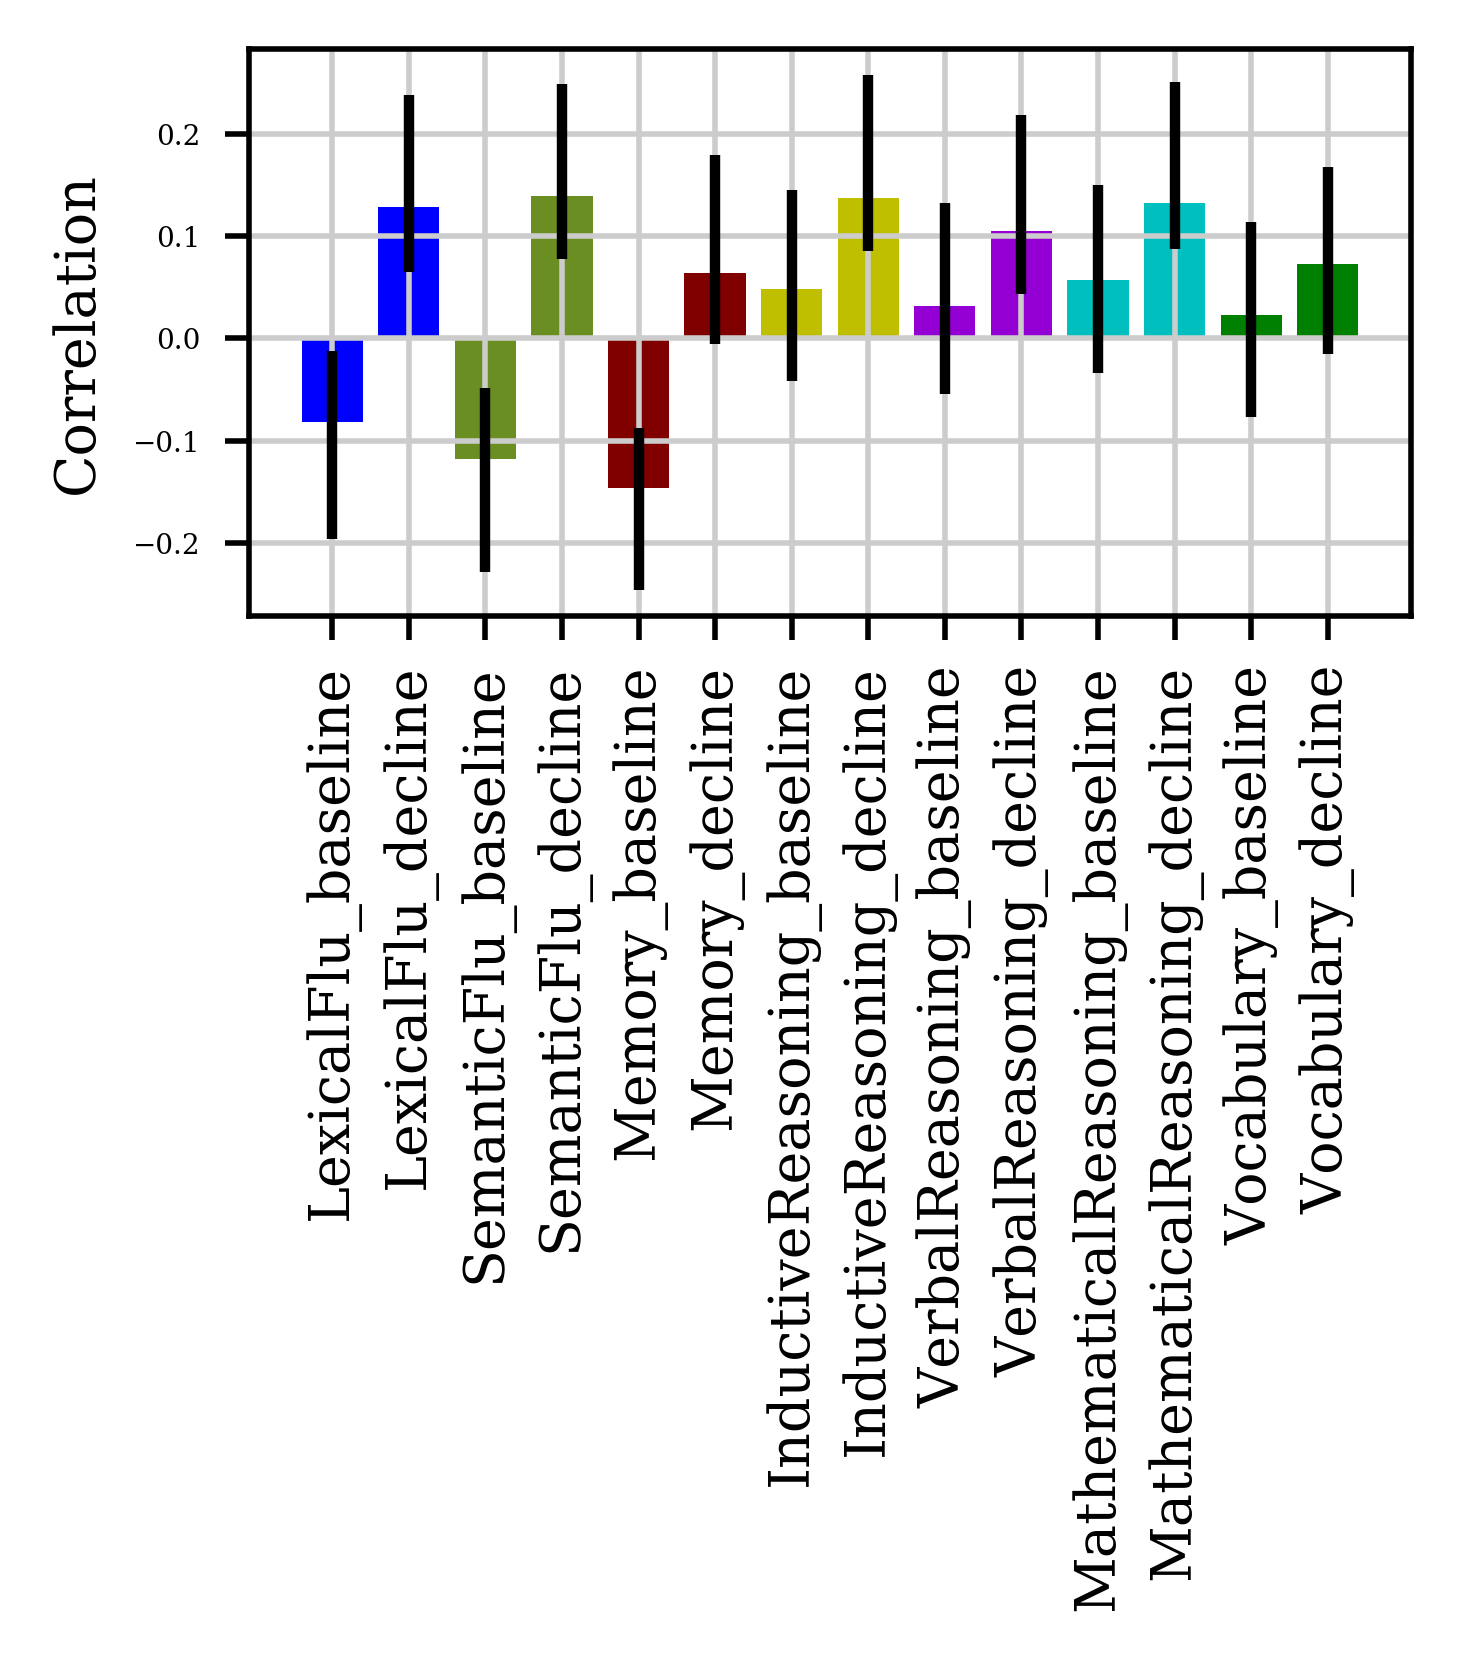

In [9]:
#no sig markers
lv_fname = 'lv_two.mat'
out_base = 'hbm_lv_two'
lv_two = hdf5storage.loadmat(lv_fname)
lv_two_err = np.concatenate( (lv_two['lower'], lv_two['upper']))
#plot results from lvtwo
fig, ax2 = plt.subplots(1,1, figsize = (3,1.5),dpi = 500)
#plt.subplots_adjust(wspace = 0.3)

y_pos = np.arange(len(lv_two['lvcorrs'].tolist()[0]))
p = ax2.bar(y_pos,lv_two['lvcorrs'].tolist()[0], yerr = lv_two_err, align = 'center', color = mycolors,
           error_kw = {'elinewidth':1.5})
ax2.xaxis.set_major_formatter(FixedFormatter(behavs_list_updated))
ax2.xaxis.set_major_locator(FixedLocator(y_pos))
ax2.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', labelsize=8)
ax2.tick_params(axis='y', labelsize=4)
ax2.set_ylabel("Correlation",fontsize=8)
#ax2.yaxis.set_label_position("right")
ax2.grid(which='both', color='#CCCCCC')
ax2.set_facecolor('white')

plt.savefig("lvtwo_flat.png",bbox_inches='tight', dpi = 'figure')

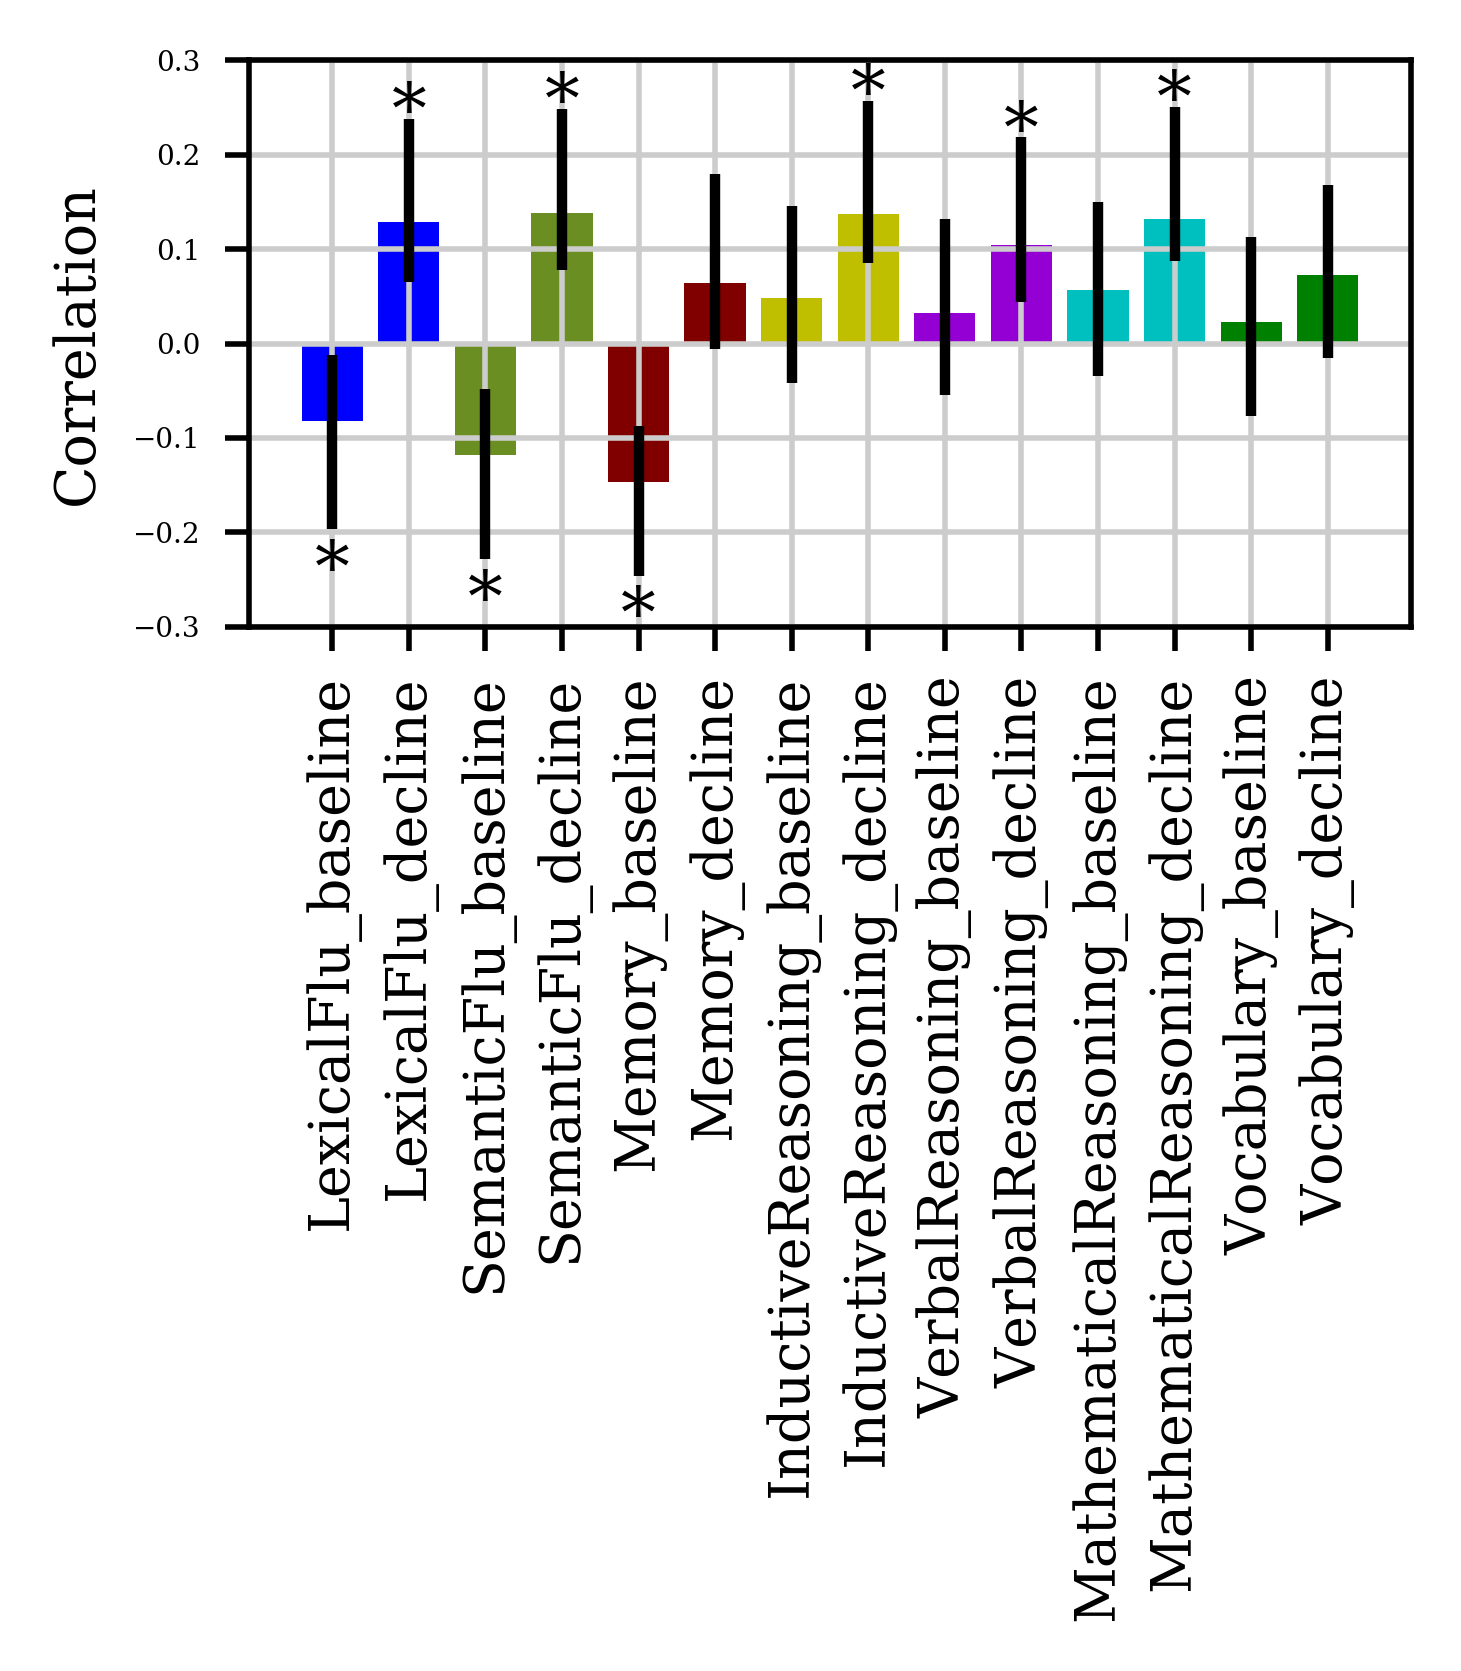

In [10]:
#with sig markers
lv_fname = 'lv_two.mat'
out_base = 'hbm_lv_two'
lv_two = hdf5storage.loadmat(lv_fname)
lv_two_err = np.concatenate( (lv_two['lower'], lv_two['upper']))
#plot results from lvtwo
fig, ax2 = plt.subplots(1,1, figsize = (3,1.5),dpi = 500)
#plt.subplots_adjust(wspace = 0.3)

y_pos = np.arange(len(lv_two['lvcorrs'].tolist()[0]))
p = ax2.bar(y_pos,lv_two['lvcorrs'].tolist()[0], yerr = lv_two_err, align = 'center', color = mycolors,
           error_kw = {'elinewidth':1.5})
ax2.xaxis.set_major_formatter(FixedFormatter(behavs_list_updated))
ax2.xaxis.set_major_locator(FixedLocator(y_pos))
ax2.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', labelsize=8)
ax2.tick_params(axis='y', labelsize=4)
ax2.set_ylabel("Correlation",fontsize=8)
ax2.set_ylim((-0.3,0.3))
ax2.grid(which='both', color='#CCCCCC')
ax2.set_facecolor('white')

sig_list = ['*','*','*','*','*','','','*','','*','','*','','']
idx=0
for rect in p:
    x=rect.get_x() + rect.get_width() / 2
    if rect.get_height() < 0:
        #y=0.03
        y=lv_two['lvcorrs'].tolist()[0][idx] - lv_two_err[0][idx] - 0.045
    else:
        #y=-0.08
        y=lv_two['lvcorrs'].tolist()[0][idx] + lv_two_err[1][idx] + 0.005
    ax2.annotate(sig_list[idx],xy=(x,y), textcoords="data", ha='center', va='center')
    idx+=1

plt.savefig("lvtwo_flat_sigmarkers.png",bbox_inches='tight', dpi = 'figure')

In [9]:
#make a df containing the point estimates and conf intervals for each lv
#use this to complete Table 2 in paper
lvone_lvcorrs=lv_one['lvcorrs'][0]
lvone_lower=lvone_lvcorrs - lv_one['lower'][0]; lvone_upper=lvone_lvcorrs + lv_one['upper'][0]
lvtwo_lvcorrs=lv_two['lvcorrs'][0]
lvtwo_lower=lvtwo_lvcorrs - lv_two['lower'][0]; lvtwo_upper=lvtwo_lvcorrs + lv_two['upper'][0]

lvcorrs_dict={'Cog':behavs_list,'LV1_R':lvone_lvcorrs.tolist(), 'LV1_lower':lvone_lower.tolist(),
             'LV1_upper':lvone_upper.tolist(), 'LV2_R':lvtwo_lvcorrs.tolist(), 'LV2_lower':lvtwo_lower.tolist(),
             'LV2_upper':lvtwo_upper.tolist()}

lvcorrs_df = pd.DataFrame(lvcorrs_dict)
lvcorrs_df

,Cog,LV1_R,LV1_lower,LV1_upper,LV2_R,LV2_lower,LV2_upper
0,WordRecall_int,-0.224177,-0.339423,-0.168474,-0.081867,-0.196317,-0.012513
1,WordRecall_slope,0.172668,0.074447,0.274792,0.128435,0.065318,0.238176
2,AnimalRecall_int,-0.249681,-0.367745,-0.201862,-0.118166,-0.228428,-0.048546
3,AnimalRecall_slope,0.253244,0.185864,0.361783,0.138696,0.077427,0.248826
4,Memory_int,-0.162564,-0.284851,-0.089414,-0.146442,-0.245828,-0.087318
5,Memory_slope,0.069504,-0.026080,0.197125,0.063909,-0.005437,0.179399
6,AH4_int,-0.343790,-0.444513,-0.303964,0.048199,-0.041638,0.145296
7,AH4_slope,-0.253013,-0.368996,-0.193841,0.136997,0.085251,0.257306
8,AH4verbal_int,-0.323177,-0.420314,-0.291775,0.031891,-0.054488,0.132026
9,AH4verbal_slope,-0.252917,-0.363617,-0.198587,0.104702,0.043862,0.218534


In [22]:
for index, row in lvcorrs_df.iterrows():
    print(row['Cog'],'   ', np.around(row['LV1_R'],2), '[',
          np.around(row['LV1_lower'],2), ',', np.around(row['LV1_upper'],2), ']')

WordRecall_int     -0.22 [ -0.34 , -0.17 ]
WordRecall_slope     0.17 [ 0.07 , 0.27 ]
AnimalRecall_int     -0.25 [ -0.37 , -0.2 ]
AnimalRecall_slope     0.25 [ 0.19 , 0.36 ]
Memory_int     -0.16 [ -0.28 , -0.09 ]
Memory_slope     0.07 [ -0.03 , 0.2 ]
AH4_int     -0.34 [ -0.44 , -0.3 ]
AH4_slope     -0.25 [ -0.37 , -0.19 ]
AH4verbal_int     -0.32 [ -0.42 , -0.29 ]
AH4verbal_slope     -0.25 [ -0.36 , -0.2 ]
AH4numeric_int     -0.34 [ -0.45 , -0.29 ]
AH4numeric_slope     -0.15 [ -0.27 , -0.08 ]
MillHill_int     -0.33 [ -0.43 , -0.25 ]
MillHill_slope     0.03 [ -0.07 , 0.11 ]


In [23]:
for index, row in lvcorrs_df.iterrows():
    print(row['Cog'],'   ', np.around(row['LV2_R'],2), '[',
          np.around(row['LV2_lower'],2), ',', np.around(row['LV2_upper'],2), ']')

WordRecall_int     -0.08 [ -0.2 , -0.01 ]
WordRecall_slope     0.13 [ 0.07 , 0.24 ]
AnimalRecall_int     -0.12 [ -0.23 , -0.05 ]
AnimalRecall_slope     0.14 [ 0.08 , 0.25 ]
Memory_int     -0.15 [ -0.25 , -0.09 ]
Memory_slope     0.06 [ -0.01 , 0.18 ]
AH4_int     0.05 [ -0.04 , 0.15 ]
AH4_slope     0.14 [ 0.09 , 0.26 ]
AH4verbal_int     0.03 [ -0.05 , 0.13 ]
AH4verbal_slope     0.1 [ 0.04 , 0.22 ]
AH4numeric_int     0.06 [ -0.03 , 0.15 ]
AH4numeric_slope     0.13 [ 0.09 , 0.25 ]
MillHill_int     0.02 [ -0.08 , 0.11 ]
MillHill_slope     0.07 [ -0.02 , 0.17 ]
